## Import necessary libraries

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as pyo

pyo.init_notebook_mode()
import plotly.express as px

%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

In [124]:
# load the dataset
df = pd.read_csv('moviestreams.csv')

In [125]:
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [126]:
# total number of rows and columns
df.shape

(16744, 17)

In [127]:
cols = df.columns.to_list()
cols

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [128]:
# Drop ['Unnamed: 0', 'ID] columns
df.drop(['Unnamed: 0', 'ID'], axis=1, inplace= True)
cols = df.columns.to_list()
cols

['Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

### Check for missing  values

In [129]:
df.isna().sum()

Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [130]:
df['Age'].value_counts()

18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

In [131]:
# Remove the '+' sign attached to the values in the AGE column
age_map = {'18+' : 18, '7+' : 7, '13+' : 13, 'all' : 0, '16+' : 16}
df['AgeCopy'] = df['Age'].map(age_map)
df['AgeCopy'].head()

0    13.0
1    18.0
2    13.0
3     7.0
4    18.0
Name: AgeCopy, dtype: float64

In [132]:
# Remove the '%' sign attached to the values in the Rottan Tomatoes column
df['New_Rottan_Tomatoes'] = df['Rotten Tomatoes'].str.replace('%','')
for i in df['New_Rottan_Tomatoes']:
  if i == str:
    i.astype(int)
df['New_Rottan_Tomatoes']

0         87
1         87
2         84
3         96
4         97
        ... 
16739    NaN
16740    NaN
16741    NaN
16742    NaN
16743    NaN
Name: New_Rottan_Tomatoes, Length: 16744, dtype: object

## **Data Visualisation**

In [133]:
# What is the number movies for each age group?
df['Age'].value_counts()

18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

In [134]:
# Top 10 languages in Streaming Services
language = df['Language'].value_counts().head(10)
language.index

Index(['English', 'Hindi', 'English,Spanish', 'Spanish', 'English,French',
       'Italian', 'French', 'Japanese', 'Mandarin', 'Tamil'],
      dtype='object')

In [135]:
language.values

array([10955,   503,   276,   267,   174,   166,   163,   155,   151,
          93])

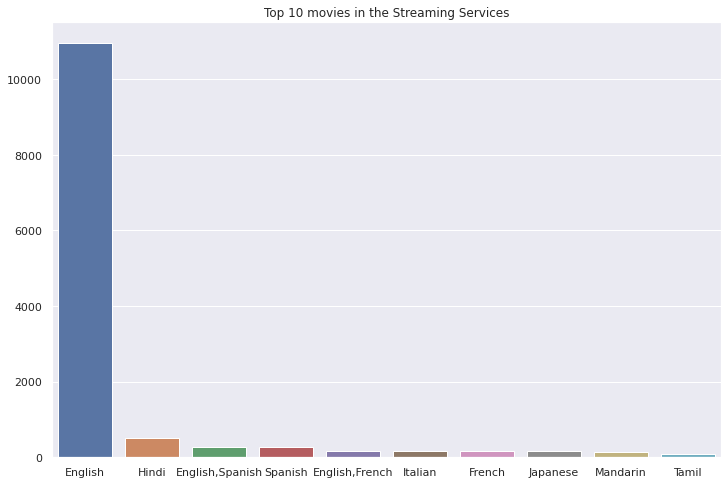

In [136]:
sns.set_theme()
plt.figure(figsize=(12,8))
plt.title('Top 10 movies in the Streaming Services')
sns.barplot(x=language.index, y=language.values)
plt.show()

In [137]:
from IPython.display import HTML 

fig=px.pie(df, values=language.values,
           names=language.index,
           title='Top 10 movies in the Streaming Services',
           height=600)

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

In [138]:
#Number of movies in specific age group in all Services
fig = px.bar(df, 
             x=df['Age'].value_counts().index, 
             y=df['Age'].value_counts(),
             title="Number of Movies in specific age group in All services",
             text=df['Age'].value_counts(),
             height=600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

In [139]:
# Number of movies in specific age group in Netflix

netflix_df=df[df['Netflix']==1]
fig = px.bar(netflix_df, 
             x=netflix_df['Age'].value_counts().index, 
             y=netflix_df['Age'].value_counts(),
             title="Number of Movies in specific age group in Netflix",
             text=netflix_df['Age'].value_counts(), 
             height=600)
fig.update_traces(marker_color='gold', texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

In [140]:
# Number of movies in specific age group in Amazon Prime

prime_df = df[df['Prime Video']==1]
fig=px.bar(prime_df,
           x=prime_df['Age'].value_counts().index,
           y=prime_df['Age'].value_counts(),
           title='Number of movies in specific age group in Amazon Prime Video',
           text=prime_df['Age'].value_counts(),
           height=600)

fig.update_traces(marker_color='firebrick',texttemplate='%{text:.2s}', textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

In [141]:
# Number of movies in specific age group in Disney +

disney_df = df[df['Disney+']==1]
fig = px.bar(disney_df, 
             x=disney_df['Age'].value_counts().index,
             y = disney_df['Age'].value_counts(),
             title = 'Number of movies in specific age group in Disney+',
             text = disney_df['Age'].value_counts(),
             height=600)
fig.update_traces(marker_color='dodgerblue',texttemplate='%{text:.2s}', textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

In [142]:
# Number of movies in specific age group in Hulu

hulu_df = df[df['Hulu']==1]
fig = px.bar(hulu_df, x=hulu_df['Age'].value_counts().index,
             y = hulu_df['Age'].value_counts(),
             title = 'Number of movies in specific age group in Hulu',
             text = hulu_df['Age'].value_counts(),
             height=600)
fig.update_traces(marker_color='black',texttemplate='%{text: .2s}', textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

## Rotten Tomatoes Ratings for overall services

In [143]:
fig = px.bar(df, 
             x=df['Rotten Tomatoes'].value_counts().index,
             y=df['Rotten Tomatoes'].value_counts(),
             title='Overall Rotten Tomatoes Ratings',
             text=df['Rotten Tomatoes'].value_counts(),
             height=600)
fig.update_traces(marker_color='navy',texttemplate='%{text:.2s}', textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

### Rotten Tomatoes Ratings for each of the movies

In [144]:
df.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime', 'AgeCopy', 'New_Rottan_Tomatoes'],
      dtype='object')

In [145]:
rt_score=pd.DataFrame({'Streaming_Service' : ['Netflix', 'Prime Video', 'Disney+', 'Hulu'],
 'Rotten_Tomato_Score' : [netflix_df['Rotten Tomatoes'].value_counts()[0],
                            hulu_df['Rotten Tomatoes'].value_counts()[0],
                            prime_df['Rotten Tomatoes'].value_counts()[0],
                            disney_df['Rotten Tomatoes'].value_counts()[0]]})

rt_score.head()

,Streaming_Service,Rotten_Tomato_Score
0,Netflix,130
1,Prime Video,18
2,Disney+,257
3,Hulu,19


In [146]:
# Sort the values
sorted_rt_score = rt_score.sort_values(ascending=False, by='Rotten_Tomato_Score')
sorted_rt_score

,Streaming_Service,Rotten_Tomato_Score
2,Disney+,257
0,Netflix,130
3,Hulu,19
1,Prime Video,18


In [147]:
fig = px.bar(sorted_rt_score, 
             x=sorted_rt_score['Streaming_Service'],
             y=sorted_rt_score['Rotten_Tomato_Score'],
             title='Rotten Tomato Ratings For Each Services',
             text = sorted_rt_score['Rotten_Tomato_Score'],
             height=600)
fig.update_traces(marker_color='purple',texttemplate='%{text:.2s}', textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

# **IMDb Ratings**

In [148]:
df['IMDb'].value_counts().index

Float64Index([6.5, 6.2, 6.4, 6.3, 6.1, 6.7, 5.8, 6.6, 7.1, 7.2, 6.8, 6.9, 7.0,
              5.7, 5.9, 7.3, 5.5, 5.3, 5.6, 6.0, 5.4, 7.4, 5.2, 5.1, 5.0, 7.5,
              4.7, 4.8, 7.6, 4.6, 4.9, 4.5, 7.7, 4.4, 4.2, 7.8, 4.1, 4.3, 7.9,
              3.8, 8.0, 3.5, 3.9, 3.6, 4.0, 3.7, 8.1, 8.2, 3.3, 3.4, 3.2, 3.1,
              8.3, 2.8, 3.0, 2.9, 2.7, 8.4, 2.5, 2.6, 2.4, 8.5, 2.3, 8.6, 2.1,
              2.2, 8.7, 2.0, 8.8, 8.9, 1.6, 1.9, 1.7, 1.8, 9.3, 1.4, 0.0, 9.0,
              9.1, 1.0, 1.5, 1.3],
             dtype='float64')

In [149]:
fig = px.bar(df,
             x=df['IMDb'].value_counts().index,
             y=df['IMDb'].value_counts(),
             title='Overall IMDb Ratings For All Services',
             text=df['IMDb'].value_counts(),
             height=600)
fig.update_traces(marker_color='orangered', texttemplate="%{text:.2s}", textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

In [150]:
# IMDB Ratings Of Netflix Movies
fig = px.bar(netflix_df, 
             x=netflix_df['IMDb'].value_counts().index, 
             y=netflix_df['IMDb'].value_counts(),
             title="IMDB Ratings Of Netflix Movies",
             text=netflix_df['IMDb'].value_counts(), 
             height=600)
fig.update_traces(marker_color='gold', texttemplate='%{text:.2s}', textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

In [151]:
df.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime', 'AgeCopy', 'New_Rottan_Tomatoes'],
      dtype='object')

In [152]:
# IMDB Ratings Of Hulu Movies

fig = px.bar(hulu_df,
             x=hulu_df['IMDb'].value_counts().index,
             y=hulu_df['IMDb'].value_counts(),
             title='IMDB Ratings Of Hulu Movies',
             text=hulu_df['IMDb'].value_counts(),
             height=600)
fig.update_traces(marker_color='black', texttemplate='%{text:.2s}', textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

In [153]:
# IMBD Ratings For Prime Videos

fig = px.bar(prime_df,
             x=prime_df['IMDb'].value_counts().index,
             y=prime_df['IMDb'].value_counts(),
             title='IMDB Ratings For Prime Video',
             text=prime_df['IMDb'].value_counts(),
             height=600)
fig.update_traces(marker_color='firebrick', texttemplate='%{text:.2s}', textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

In [154]:
# IMDB Ratings Of Disney+ Movies

fig=px.bar(disney_df,
           x=disney_df['IMDb'].value_counts().index,
           y=disney_df['IMDb'].value_counts(),
           title='IMDB Ratings Of Disney+ Movies',
           text=disney_df['IMDb'].value_counts(),
           height=600)
fig.update_traces(marker_color='dodgerblue', texttemplate='%{text:.2s}', textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

# **Runtime Count of Movies**

In [155]:
RuntimeCount=pd.DataFrame(df['Runtime'].value_counts().sort_values(ascending=False)[:10].items(),
                          columns=['Runtime', 'Count'])

RuntimeCount.head()

,Runtime,Count
0,90.0,971
1,95.0,489
2,92.0,434
3,93.0,422
4,85.0,408


In [156]:
fig = px.bar(RuntimeCount,
             x=RuntimeCount['Runtime'],
             y=RuntimeCount['Count'],
             title='Count Of Runtime Of Movies',
             text=RuntimeCount['Runtime'],
             height=600)
fig.update_traces(marker_color='darkslategrey', texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

### **Dirctors And Their Count Of Movies They Have Directed**

In [157]:
df['Directors']=df['Directors'].astype(str) # run before the below code

In [158]:
new_data=df[df['Directors'] !=np.nan]

directors_count=dict()

dirct_in_data=list(new_data['Directors'])
for xdir in dirct_in_data:
  curr_dirc = xdir.split(',')
  for xd in curr_dirc:
    if xd in directors_count.keys():
      directors_count[xd]=directors_count.get(xd)+1
    else:
      directors_count[xd] = 1

In [159]:
Dirct_Count=pd.DataFrame(directors_count.items(),columns=['Director', 'Count'])

Dirct_Count=Dirct_Count.sort_values(ascending=False,by='Count').head(20)

Dirct_Count

,Director,Count
56,nan,726
977,Jay Chapman,36
8166,Joseph Kane,31
1103,Cheh Chang,29
6950,William Beaudine,23
4827,Jim Wynorski,23
8665,Sam Newfield,22
8519,David DeCoteau,21
1414,Raúl Campos,21
136,Jay Karas,21


In [160]:
# Drop the nan value

Dirct_Count=Dirct_Count.drop(56, axis=0)

Dirct_Count

,Director,Count
977,Jay Chapman,36
8166,Joseph Kane,31
1103,Cheh Chang,29
6950,William Beaudine,23
4827,Jim Wynorski,23
8665,Sam Newfield,22
8519,David DeCoteau,21
1414,Raúl Campos,21
136,Jay Karas,21
1415,Jan Suter,21


In [161]:
fig = px.bar(Dirct_Count,
             x=Dirct_Count['Director'],
             y=Dirct_Count['Count'],
             title='Count Of Directors of Movies',
             text=Dirct_Count['Count'],
             height=600)
fig.update_traces(marker_color='darkturquoise', texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

In [162]:
df[df['Directors']=='Christopher Nolan'][['Directors', 'Title', 'Genres', 'Runtime', 'IMDb']]

,Directors,Title,Genres,Runtime,IMDb
0,Christopher Nolan,Inception,"Action,Adventure,Sci-Fi,Thriller",148.0,8.8
3560,Christopher Nolan,The Dark Knight,"Action,Crime,Drama,Thriller",152.0,9.0
3565,Christopher Nolan,Batman Begins,"Action,Adventure",140.0,8.2
7534,Christopher Nolan,Dunkirk,"Action,Drama,History,Thriller,War",106.0,7.2


## **Exploring Genres**

In [163]:
genres_=dict(df['Genres'].value_counts())
count_genres=dict()

for g,count in genres_.items():
  g=g.split(',')
  for i in g:
    if i in count_genres.keys():
      count_genres[i]=count_genres[i]+1
    else:
      count_genres[i]=1

In [164]:
Genres_count_df=pd.DataFrame(count_genres.items(),columns=['Genres', 'Count'])

Genres_count_df=Genres_count_df.sort_values(ascending=False,by='Count')

Genres_count_df

,Genres,Count
0,Drama,868
2,Comedy,654
19,Adventure,560
6,Action,553
5,Thriller,467
11,Family,426
4,Romance,420
20,Fantasy,371
7,Crime,347
9,Mystery,318


In [165]:
fig=px.bar(Genres_count_df,
           x=Genres_count_df['Genres'],
           y=Genres_count_df['Count'],
           title='Genres of Movies',
           text=Genres_count_df['Count'],
           height=600)
fig.update_traces(marker_color='forestgreen', texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

### **What are the top movies on each platform**

###### **Netflix**

In [166]:
df.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime', 'AgeCopy', 'New_Rottan_Tomatoes'],
      dtype='object')

In [167]:
data_netflix_top=netflix_df[netflix_df['IMDb']>8.5]

data_netflix_top=data_netflix_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
data_netflix_top

,Title,IMDb
1292,My Next Guest with David Letterman and Shah Ru...,9.3
947,Natsamrat,9.1
0,Inception,8.8
4,"The Good, the Bad and the Ugly",8.8
1,The Matrix,8.7
1214,Bill Hicks: Relentless,8.7
1311,Eh Janam Tumhare Lekhe,8.7
1458,Untamed Romania,8.7
1979,One Heart: The A.R. Rahman Concert Film,8.7
845,Gol Maal,8.6


In [168]:
fig=px.bar(data_netflix_top,
           x=data_netflix_top['Title'],
           y=data_netflix_top['IMDb'],
           title='Top Movies of Netflix',
           text=data_netflix_top['IMDb'],
           height=800)
fig.update_traces(marker_color='indianred', texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

###### **Amazon Prime**

In [169]:
data_prime_top=prime_df[prime_df['IMDb']>8.5]

data_prime_top=data_prime_top[['Title', 'IMDb', 'Year']].sort_values(ascending=False, by='IMDb').head(20)

data_prime_top

,Title,IMDb,Year
5110,Love on a Leash,9.3,2011
7426,Bounty,9.3,2011
6837,Steven Banks: Home Entertainment Center,9.3,1989
6566,Square One,9.3,2019
7220,"Down, But Not Out!",9.3,2015
8458,Where's Daddy?,9.1,2017
7491,Finding Family,9.1,2013
7002,Escape from Firebase Kate,9.0,2015
7267,A Dog Named Gucci,9.0,2015
4829,The Mountain II,8.9,2016


In [170]:
fig=px.bar(data_prime_top,
           x=data_prime_top['Title'],
           y=data_prime_top['IMDb'],
           title='Top Movies in Prime',
           text=data_prime_top['IMDb'],
           height=600)
fig.update_traces(marker_color='indigo', texttemplate='%{text:.2s}', textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

In [171]:
df.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime', 'AgeCopy', 'New_Rottan_Tomatoes'],
      dtype='object')

###### **Hulu**

In [172]:
data_hulu_top=hulu_df[hulu_df['IMDb']>8.0]

data_hulu_top=data_hulu_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')

data_hulu_top

,Title,IMDb
3560,The Dark Knight,9.0
3561,GoodFellas,8.7
3562,Parasite,8.6
3564,The Green Mile,8.6
4283,Brad Paisley Thinks He's Special,8.5
3566,Grave of the Fireflies,8.5
3563,Good Will Hunting,8.3
3890,Larger than Life: The Kevyn Aucoin Story,8.3
3742,Andy Irons: Kissed by God,8.3
3580,Free Solo,8.2


In [173]:
fig=px.bar(data_hulu_top,
           x=data_hulu_top['Title'],
           y=data_hulu_top['IMDb'],
           title='Top Movies in Hulu',
           text=data_hulu_top['IMDb'],
           height=700)
fig.update_traces(marker_color='khaki', texttemplate='%{text:.2s}', textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

###### **Disney+**

In [174]:
data_disney_top=disney_df[disney_df['IMDb']>8.0]

data_disney_top=data_disney_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')

data_disney_top

,Title,IMDb
16213,Star Wars: The Empire Strikes Back,8.7
16212,Star Wars: A New Hope,8.6
16214,The Lion King,8.5
16441,Newsies: The Broadway Musical,8.5
16221,Coco,8.4
16216,Avengers: Endgame,8.4
16217,WALL·E,8.4
16309,Before the Flood,8.3
16215,Toy Story,8.3
16582,Phineas and Ferb: Mission Marvel,8.3


In [175]:
fig=px.bar(data_disney_top,
           x=data_disney_top['Title'],
           y=data_disney_top['IMDb'],
           title='Top Movies in Disney+',
           text=data_disney_top['IMDb'],
           height=700)
fig.update_traces(marker_color='lawngreen', texttemplate='%{text:.2s}', textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

#### **What is the average streaming time on each platform?**

In [177]:
df.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime', 'AgeCopy', 'New_Rottan_Tomatoes'],
      dtype='object')

### **Netflix**

In [182]:
avrge_netflix_runtime=netflix_df['Runtime'].mean(axis=0)

avrge_netflix_runtime

98.91290032924275

### **Hulu**

In [183]:
avrge_hulu_runtime=hulu_df['Runtime'].mean(axis=0)

avrge_hulu_runtime

97.39661016949152

### **Prime Video**

In [184]:
prime_avrge_runtime=prime_df['Runtime'].mean(axis=0)

prime_avrge_runtime

92.29398032349508

### **Disney+**

In [185]:
disney_avrge_runtime=disney_df['Runtime'].mean(axis=0)

disney_avrge_runtime

90.42522522522522

**What are the movies were created before 1990?**

In [188]:
before_1990 = df[df['Year']<1990].head(20)

before_1990

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,AgeCopy,New_Rottan_Tomatoes
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,7.0,96
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,18.0,97
8,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0,7.0,95
10,Taxi Driver,1976,18+,8.3,95%,1,0,0,0,0,Martin Scorsese,"Crime,Drama",United States,"English,Spanish",114.0,18.0,95
14,Monty Python and the Holy Grail,1975,7+,8.2,97%,1,0,0,0,0,"Terry Gilliam,Terry Jones","Adventure,Comedy,Fantasy",United Kingdom,"English,French,Latin",91.0,7.0,97
15,Once Upon a Time in the West,1968,13+,8.5,95%,1,0,1,0,0,Sergio Leone,Western,"Italy,United States","Italian,English,Spanish",165.0,13.0,95
16,Indiana Jones and the Last Crusade,1989,13+,8.2,88%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Greek,Arabic",127.0,13.0,88
24,Life of Brian,1979,18+,8.1,95%,1,0,0,0,0,Terry Jones,Comedy,United Kingdom,"English,Latin",94.0,18.0,95
39,Ferris Bueller's Day Off,1986,13+,7.8,80%,1,0,0,0,0,John Hughes,Comedy,United States,"English,German",103.0,13.0,80
44,Indiana Jones and the Temple of Doom,1984,7+,7.6,85%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,Sinhalese,Hindi",118.0,7.0,85
